## Regression
* 경사하강법으로 OLS나 BLUE 찾음
* 일반 선형 회귀 : 예측값과 실제 값의 RSS를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델
* 릿지(Ridge) : L2 규제를 추가한 회귀 모델
* 라쏘(Lasso) : L1 규제를 적용한 방식
* 엘라스틱넷(ElasticNet) : L2, L1 규제를 함께 결합한 모델
* 로지스틱 회귀(Logistic Regression) : 로지스틱 회귀는 회귀보다는 분류 모형

### RSS
* 회귀의 비용 함수
* w(회귀계수)의 최적값과 관련

#### 코딩으로 경사 하강법 구현

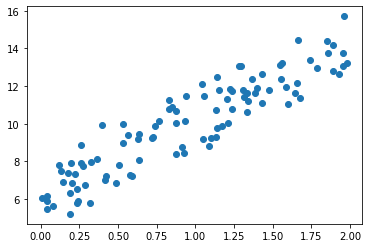

In [39]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
# y = 4X + 6 식을 근사 (w1 = 4, w0 = 6). random 값은 Noise를 위해 만듦
X = 2 * np.random.rand(100,1)
y = 6 + 4*X + np.random.randn(100,1)

# X, y 데이터 셋 scatter plot 으로 시각화
plt.scatter(X,y)

In [40]:
# w1과 w0를 업데이트할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01) :
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계싼하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred

    # w0_update를 내적으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))

    # w1과 w0를 업데이트 할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update


In [41]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함
def gradient_descent_steps(X, y, iters=10000) :
    # w0와 w1을 모두 0으로 초기화.
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여
    # w1, w0 업데이트 수행
    for ind in range(iters) :
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [42]:
def get_cost(y, y_pred) :
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N  # 오차값
    return cost

In [43]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print(f"w1:{w1[0,0]:.3f} w0:{w0[0,0]:.3f}")
y_pred = w1[0,0]*X + w0
print(f"Gradient Descent Total Cost:{get_cost(y, y_pred):.4f}")

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


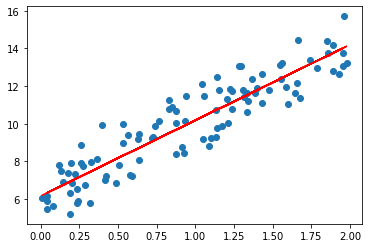

In [44]:
plt.scatter(X, y)
plt.plot(X, y_pred, c="r")

### Stochastic Gradient Descent 구현

In [45]:
# 샘플링으로 데이터를 추출하여 시간 단축
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000) :
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0

    for ind in range(iters) :
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.1)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [46]:
np.random.permutation(X.shape[0])

array([66, 71, 54, 88, 82, 12, 36, 46, 14, 67, 10,  3, 62, 29, 97, 69, 70,
       93, 31, 73, 60, 96, 28, 27, 21, 19, 33, 78, 32, 94,  1, 41, 40, 76,
       37, 87, 24, 23, 50,  2, 47, 20, 77, 17, 56, 64, 68, 25, 15, 22, 16,
       98, 63, 92, 86, 38,  6, 57, 95, 44,  9, 42, 81, 99, 35, 84, 59, 48,
       75, 65, 85, 90, 55, 43, 58, 89, 30, 80, 34, 18, 51, 49, 52, 74, 26,
       45, 39,  4, 11, 53, 91, 79,  8,  0,  5, 13, 61, 72,  7, 83])

In [47]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print(f"w1 : {round(w1[0,0],3)}, wo : {round(w0[0,0],3)}")
y_pred = w1[0,0] * X + w0
print(f"Stochastic Gradient Descent Total Cost : {get_cost(y, y_pred):.4f}")

w1 : 4.028, wo : 6.165
Stochastic Gradient Descent Total Cost : 0.9936


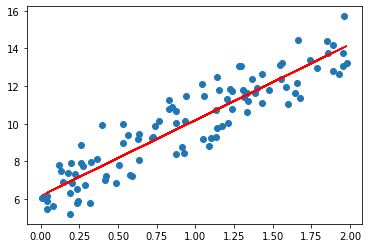

In [48]:
plt.scatter(X, y)
plt.plot(X, y_pred, c="r")

### 선형 회귀의 다중 공선성 문제
* 일반적으로 선형 회귀는 입력 피처의 독립성에 큰 영향을 받음.   
피처간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 민감해짐.    
multi-collinearity문제.
* 일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용함.

##### 단순 회귀 연습

In [49]:
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

X = [[174], [152], [138], [128], [186]]
y = [71, 55, 46, 38, 88]
reg.fit(X,y)                # 학습

print(reg.predict([[180]]))

[79.6131561]


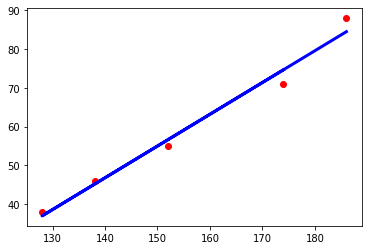

In [50]:
# 학습 데이터와 y 값을 산포도로 그린다.
plt.scatter(X, y, color="red")

# 학습 데이터를 입력으로 하여 예측값을 계산한다.
y_pred = reg.predict(X)

# 학습 데이터와 예측값으로 선그래프를 그린다.
# 계산된 기울기와 y 절편을 가지는 직선이 그려진다.
plt.plot(X, y_pred, color="blue", linewidth=3)
plt.show()

## 다항 선형 회귀(Polinomial Linear Regression)
* $y=w_0 + w_1x_1 + w_2x_2 + w_3x_1x_2 + w_4x_1^2 + w_5x_2^2$
* 회귀식이 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것을 지칭함
* 다항 회귀는 선형회귀임. 회귀에서 선형/비선형을 나누는 기준은 회귀계수가 선형인지 비선형인지.      
독립변수의 선형/비선형과는 무관함.
* 비선형의 예시 : $y=w_1cos(X+w_4)+w_2cos(2X+w_4)+w_3$ ,$\,$ $Y=w_1X^{w_2}$

### 실습 : 다항 회귀
* 1차 단항 피처들의 값이 $[x_1, x_2] = [0, 1]$ 일 경우
* 2차 다항 피처들의 값은 $[1, x_1=0, x_2=1, x_1x_2=0, x_1^2=0,x_2^2=1]$ 형태인 $[1,0,1,0,0,1]$로 변환

In [51]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print(f"일차 단항식 계수 : \n{X}")

일차 단항식 계수 : 
[[0 1]
 [2 3]]


In [52]:
# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print(f"변환된 2차 다항식 계수 feature:\n{poly_ftr}")

변환된 2차 다항식 계수 feature:
[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


##### Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인

In [53]:
def polynomial_func(X) :
    y = 1 + 2*X + X**2 + X**3
    return y

X = np.arange(4).reshape(2,2)
print(f"일차 단항식 계수 fearture : \n{X}")
y = polynomial_func(X)
print(f"삼차 단항식 결정값 : \n{y}")

일차 단항식 계수 fearture : 
[[0 1]
 [2 3]]
삼차 단항식 결정값 : 
[[ 1  5]
 [17 43]]


In [54]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print(f"3차 다항식 계수 features : \n{poly_ftr}")

#Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print(f"Polynomial 회귀 계수 : \n{np.round(model.coef_,2)}")
print(f"Polynomial 회귀 Shape : {model.coef_.shape}")

3차 다항식 계수 features : 
[[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수 : 
[[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]
Polynomial 회귀 Shape : (2, 10)


##### 파이프라인을 이용해서 3차 다항 회귀 실습

In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X) :
    y = 1 + 2*X + X**2 + X**3
    return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([
    ("poly", PolynomialFeatures(degree=3)),
    ("linear", LinearRegression())
])

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)
print(f"Polynomial 회귀 계수 : \n{np.round(model.named_steps['linear'].coef_,2)}")

Polynomial 회귀 계수 : 
[[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]


#### 다항 회귀로 보스턴 주택 가격 예측

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_boston

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# boston 데이터 셋 로드
boston = load_boston()

# boston 데이터셋 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

# boston dataset의 target array는 주택 가격. PRICE 컬럼으로 DataFrame에 존재
bostonDF["PRICE"] = boston.target

print(bostonDF.shape)
bostonDF.head()

(506, 14)


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [57]:
y_target = bostonDF["PRICE"]
X_data = bostonDF.drop(["PRICE"], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_target, test_size=0.3, random_state=156
)

In [58]:
# Pipelin 객체로 Stramline 하게 Polynomial Feature 변환과 Linear Regression을 연결
# LinearRegression의 normalize 파라미터 무시합시다. 
p_model = Pipeline([
    ("Poly", PolynomialFeatures(degree=2, include_bias=False,
                                interaction_only=False, order="C")),
    ("linear", LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None))
], verbose=False)

In [59]:
p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

# 일반 회귀와 비슷한 RMSE 값
print(f"MSE : {mse:.3f}, RMSE : {rmse:.3f}")
print(f"Variance score : {r2_score(y_test, y_preds):.3f}")

MSE : 15.556, RMSE : 3.944
Variance score : 0.782


In [60]:
# 다항 회귀에서 degree 수를 높일수록 오버피팅의 위험 주의
p_model_2 = Pipeline([
    ("Poly", PolynomialFeatures(degree=3, include_bias=False,
                                interaction_only=False, order="C")),
    ("linear", LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None))
], verbose=False)

p_model_2

Pipeline(steps=[('Poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('linear', LinearRegression())])

In [61]:
p_model_2.fit(X_train, y_train)
y_preds_2 = p_model_2.predict(X_test)
mse2 = mean_squared_error(y_test, y_preds_2)
rmse2 = np.sqrt(mse2)

# MSE 크고, R^2 score 마이너스 → 오버피팅
print(f"MSE : {mse2:.3f}, RMSE : {rmse2:.3f}")
print(f"Variance score : {r2_score(y_test, y_preds_2):.3f}")

MSE : 79625.594, RMSE : 282.180
Variance score : -1116.598


In [62]:
# degree = 2 로 변환된 다항 회귀의 피처들을 살펴보면, 기존의 피처 13개를 조합해서
# 피처가 104개로 늘어난 것을 확인할 수 있다.
# 다항식에서 degree가 높아지면 오버피팅의 위험이 있다.
X_train_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train, y_train)
print(X_train_poly.shape, X_train.shape)

(354, 104) (354, 13)


#### 다항 회귀의 차수(degree)를 변화시키면서 회귀 계수와 MSE 값 구해보고 추세선 그리기

In [63]:
# noise 값이 추가된 코사인 시뮬레이션 점 찍기
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환
def true_fun(X) :
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 random 값을 순서대로 sampling 한 데이터 입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값
y = true_fun(X) + np.random.rand(n_samples)*0.1
y

array([ 1.02192014,  1.02191599,  0.96250165,  0.90550047,  0.78225059,
       -0.17217751, -0.31272898, -0.35120115, -0.37738434, -0.49965349,
       -0.74008513, -0.7528439 , -0.7700317 , -0.84368289, -0.82725889,
       -0.88793603, -0.97102973, -0.98232013, -0.94242867, -0.82876001,
       -0.80245029, -0.78745661, -0.71250391, -0.69927576, -0.55407074,
       -0.47205303, -0.27816705, -0.23246798, -0.12376854, -0.07614573])

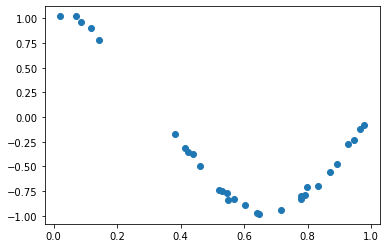

In [64]:
plt.scatter(X, y)


Degree 1 회귀 계수는 (array([-2.]), 2)
Degree 1 MSE는 0.39

Degree 4 회귀 계수는 (array([  2., -23.,  32., -11.]), 2)
Degree 4 MSE는 0.01

Degree 17 회귀 계수는 (array([ 1.47200000e+03, -5.84030000e+04,  1.23728800e+06, -1.61814690e+07,
        1.41203188e+08, -8.63524895e+08,  3.82667021e+09, -1.25721676e+10,
        3.10742082e+10, -5.82167093e+10,  8.27179153e+10, -8.85081524e+10,
        7.01306775e+10, -3.98884868e+10,  1.53951055e+10, -3.60985977e+09,
        3.88121911e+08]), 2)
Degree 17 MSE는 195962787.32


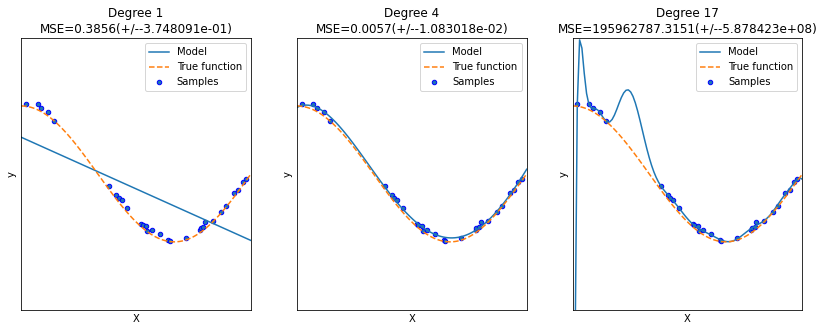

In [65]:
# 다항 회귀의 차수(degree)를 변화시키면서 회귀 계수와 mse값 구해보고 그래프로 나타내기
fig = plt.figure(figsize=(14,5))
fig.set_facecolor("w")
degrees = [1, 4, 17]

# 다항 회귀의 차수(degree)를 1, 4, 17로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)) :
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial로 변환함
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression)
    ])
    pipeline.fit(X.reshape(-1,1), y)

    # 교차 검증으로 다항 회귀를 평가합니다
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,
                            scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps["linear_regression"].coef_
    print(f"\nDegree {degrees[i]} 회귀 계수는 {np.round(coefficients),2}")
    print(f"Degree {degrees[i]} MSE는 {-1*np.mean(scores):.2f}")

    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolors="b", s=20, label="Samples")

    plt.xlabel("X"); plt.ylabel("y"); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc="best")
    plt.title(f"Degree {degrees[i]}\nMSE={-scores.mean():.4f}(+/-{-scores.std():2e})")

plt.show()

# 1은 과소적합 : 변동성은 낮지만 편향이 높음
# 17은 과대적합 : 변동성이 높으나 편향은 낮음

## 규제 선형 회귀
* Lasso : L1
* Ridge : L2
* ElasticNet : L1 + L2

#### 릿지 회귀로 보스턴 집값 예측

In [66]:
# 앞의 LinearRegression 예제에서 분할한 feature 데이터셋인 X_data와
# Target 데이터셋인 y_target 데이터셋을 그대로 이용

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_boston

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# boston 데이터 셋 로드
boston = load_boston()

# boston 데이터셋 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

# boston dataset의 target array는 주택 가격. PRICE 컬럼으로 DataFrame에 존재
bostonDF["PRICE"] = boston.target

y_target = bostonDF["PRICE"]
X_data = bostonDF.drop(["PRICE"], axis=1, inplace=False)

# 릿지 클래스
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(f"5 folds의 개별 Negative MSE scores : {np.round(neg_mse_scores, 3)}")
print(f"5 folds의 개별 RMSE scores : {np.round(rmse_scores, 3)}")
print(f"5 folds의 개별 평균 RMSE : {avg_rmse}")

5 folds의 개별 Negative MSE scores : [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores : [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 개별 평균 RMSE : 5.518166280868972


In [67]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함
for alpha in alphas :
    ridge = Ridge(alpha=alpha)

    # cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print(f"alpha {alpha}일 때 5 folds의 평균 RMSE : {avg_rmse:.3f}")

# alpha 값 증가할 수록 모델 성능 향상 되고 있음

alpha 0일 때 5 folds의 평균 RMSE : 5.829
alpha 0.1일 때 5 folds의 평균 RMSE : 5.788
alpha 1일 때 5 folds의 평균 RMSE : 5.653
alpha 10일 때 5 folds의 평균 RMSE : 5.518
alpha 100일 때 5 folds의 평균 RMSE : 5.330


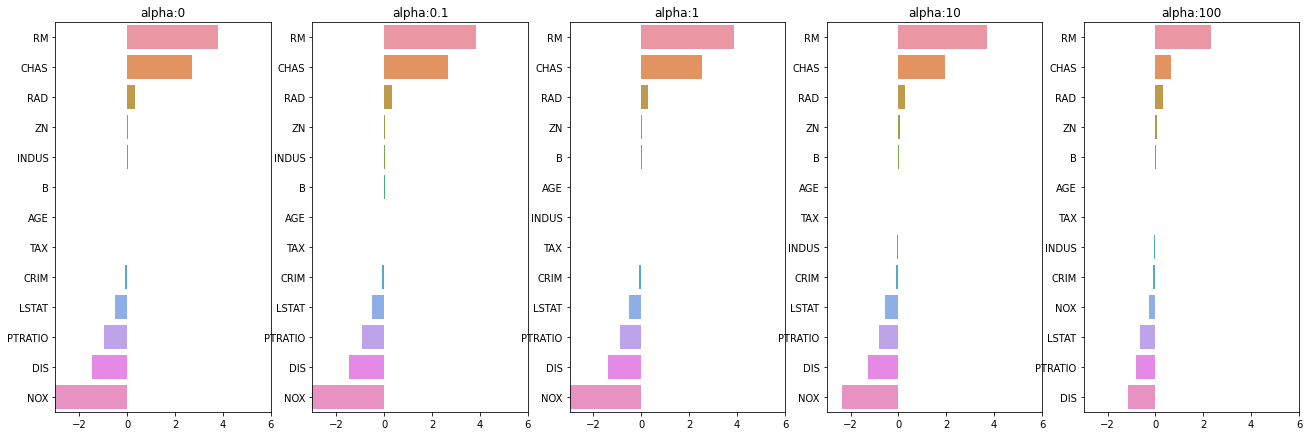

In [68]:
# 알파 값이 증가할수록 실제로 회귀 계수 값이 작아지는지 확인
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 렬로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
fig.set_facecolor("w")
fig.tight_layout()
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alpahs 리스트 값을 차례대로 입력해 회귀 계수 값 시각화 및 데이터 저장.
# pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas) :
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = "alpha:" + str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False) # 내림차순 정렬
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# for문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DF로 표시
plt.show()

# alpha가 커짐에 따라 NOX가 많이 작아져서 다른 회귀계수와 스케일이 비슷해짐

In [69]:
# 알파값에 따른 회귀 계수 출력
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = "alpha:" + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

# 릿지 회귀에서 알파값이 증가할수록 NOX값이 감소하여 다른 회귀 계수들과 스케일이 비슷해짐.
# 이로 인해 기존 회귀 모델의 성능이 개선 되었음.

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


#### Lasso 회귀 연습

In [70]:
# 평균 RMSE, 회귀 계수 값들을 반환해주는 함수 이용

from sklearn.linear_model import Lasso, ElasticNet

# alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력, 회귀 계수값들을 DF로 반환해주는 함수
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True) :
    coeff_df = pd.DataFrame()
    if verbose : print("#######", model_name, "#######")
    for param in params :
        if model_name == "Ridge" : model = Ridge(alpha=param)
        elif model_name == "Lasso" : model = Lasso(alpha=param)
        elif model_name == "ElasticNet" : model = ElasticNet(alpha=param, l1_ratio=0.7)
        
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n,
                                scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print(f"alpha {param}일 때 5 폴드 세트의 평균 RMSE : {avg_rmse:.3f}")

        # cross_val_scroe는 evaluation metric만 반호나하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data, y_target)
        # alpha에 따른 피처별 회귀 계수를 Series로 변환, 이를 DF의 컬럼으로 추가
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname = "alpha:" + str(param)
        coeff_df[colname] = coeff
    return coeff_df
# end of get_linear_reg_eval

In [71]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval("Lasso", params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

# 알파 값이 0.07일 때 RMSE가 가장 좋음

####### Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE : 5.612
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.615
alpha 0.5일 때 5 폴드 세트의 평균 RMSE : 5.669
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.776
alpha 3일 때 5 폴드 세트의 평균 RMSE : 6.189


* 라쏘는 알파 값이 증가되면 특정 피처의 회귀 계수를 0으로 만들어서 해당 피처를 회귀 식에서 제외시켜 버린다.

In [72]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DF 출력
sort_column = "alpha:" + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

# 알파 값이 0.5 이상일 때 CHAS 회귀 계수 0이 되어버림
# 알파 값 0.07부터 NOX 회귀 계수를 0으로

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [73]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio 는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval("ElasticNet", params=elastic_alphas,
                                        X_data_n=X_data, y_target_n=y_target)

# 알파값이 0.5일 때 RMSE가 가장 낮다

####### ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE : 5.542
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.526
alpha 0.5일 때 5 폴드 세트의 평균 RMSE : 5.467
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.597
alpha 3일 때 5 폴드 세트의 평균 RMSE : 6.068


In [74]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DF 출력
sort_column = "alpha:" + str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

# 엘라스틱넷 회귀는 릿지와 라쏘의 결합

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


# Boston Housing Data를 이용해 회귀 연습

Train : test = 70 : 30
1. 0: 13 => feature
2. 13 => label
3. LinearRegression     을활용하여 MSE  구하세요
Train : test = 70 : 30
1. 0: 13 => feature
2. 13 => label
3. Feature Scaling  을한후
4. LinearRegression     을활용하여 MSE
Train : test = 70 : 30
1. 0: 13 => feature
2. 13 => label
3. random_forest    또는XGBoost      를활용하여적정한
feature_select 한후
1. LinearRegression을 활용하여 MSE

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [76]:
# sep="\s+"를 통해 띄어쓰기로 분할, names로 컬럼 지정, dtype으로 데이터 수치화
columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
dt_origin = pd.read_csv("./csv_data/housing.csv", sep="\s+", names=columns, dtype=float)

dt = pd.DataFrame(dt_origin)

y = dt.iloc[:,-1]
X = dt.iloc[:, :-1]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=121)

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print(f"R^2 : {r2_score(y_test, lr_pred)}, MSE : {mean_squared_error(y_test, lr_pred)}")

R^2 : 0.6457702707255198, MSE : 28.84315432629765


In [78]:
y_ = pd.DataFrame(y_train)
y_.transpose()
y_t = pd.DataFrame(y_test)
y_t.transpose()

,175,229,257,74,220,198,472,131,159,233,...,115,380,202,155,24,306,255,120,435,201
MEDV,29.4,31.5,50.0,24.1,26.7,34.6,23.2,19.6,23.3,48.3,...,18.3,10.4,42.3,15.6,15.6,33.4,20.9,22.0,13.4,24.1


In [79]:
scaler = MinMaxScaler()

scaler.fit(X_train)
X_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaler.fit(y_)
y_scaled = scaler.transform(y_)
y_test_scaled = scaler.transform(y_t)

X_scaled_df = pd.DataFrame(X_scaled)
y_scaled_train = pd.DataFrame(y_scaled)
y_scaled_test = pd.DataFrame(y_test_scaled)

lr.fit(X_scaled, y_scaled_train)

lr_scaled_pred = lr.predict(X_test_scaled)


print(f"R^2 : {r2_score(y_scaled_test, lr_scaled_pred)}, MSE : {mean_squared_error(y_scaled_test, lr_scaled_pred)}")

R^2 : 0.6457702707255197, MSE : 0.014243533000640822


In [80]:
import xgboost as xgb
from xgboost import plot_importance

In [81]:
# eta : learning_rate 와 비슷한 개념
xgb_clt = xgb.XGBRegressor(num_round=400, eta=0.1, max_depth=5)
xgb_clt.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="rmse", eval_set=[(X_test, y_test)])

xgb_pred = xgb_clt.predict(X_test)

print(f"R^2 : {r2_score(y_test, xgb_pred)}, MSE : {mean_squared_error(y_test, xgb_pred)}")

[14:52:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "num_round" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:22.55676
[1]	validation_0-rmse:20.48831
[2]	validation_0-rmse:18.61475
[3]	validation_0-rmse:16.94546
[4]	validation_0-rmse:15.44469
[5]	validation_0-rmse:14.11733
[6]	validation_0-rmse:12.95399
[7]	validation_0-rmse:11.92288
[8]	validation_0-rmse:11.03133
[9]	validation_0-rmse:10.18506
[10]	validation_0-rmse:9.43294
[11]	validation_0-rmse:8.78640
[12]	validation_0-rmse:8.21508
[13]	validation_0-rmse:7.69299
[14]	validation_0-rmse:7.20332
[15]	validation_0-rmse:6.73980
[16]	validation_0-rmse:6.32266
[17]	validation_0-rmse:5.95956
[18]	validation_0-rmse:5

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

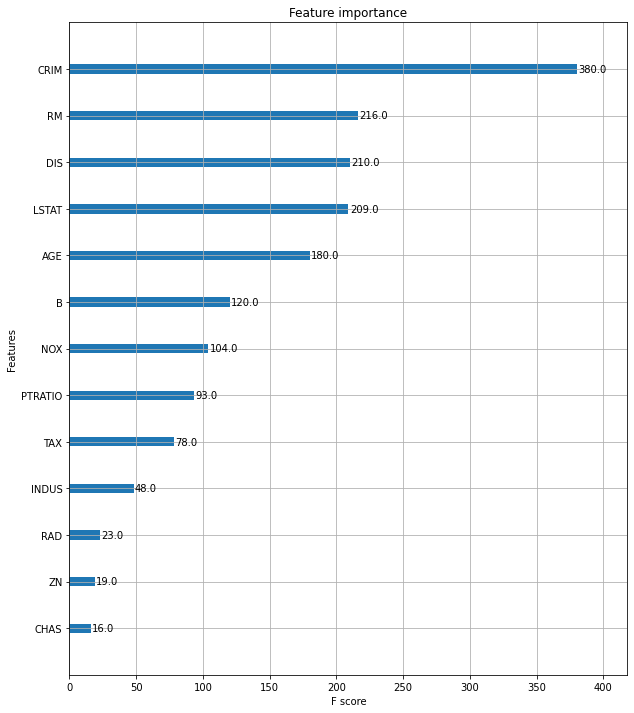

In [82]:
fig, ax = plt.subplots(figsize=(10, 12))

plot_importance(xgb_clt, ax=ax)

In [83]:
# 13개의 컬럼 중 상위 6개만 이용
columns_ft=[ "CRIM", "RM", "DIS", "LSTAT", "AGE", "B"]
X_train_ft = X_train.loc[:, columns_ft]
X_test_ft = X_test.loc[:, columns_ft]

lr.fit(X_train_ft, y_train)

pred_ft = lr.predict(X_test_ft)

print(f"R^2 : {r2_score(y_test, pred_ft)}, MSE : {mean_squared_error(y_test, pred_ft)}")

R^2 : 0.5900430145636377, MSE : 33.380745942197315


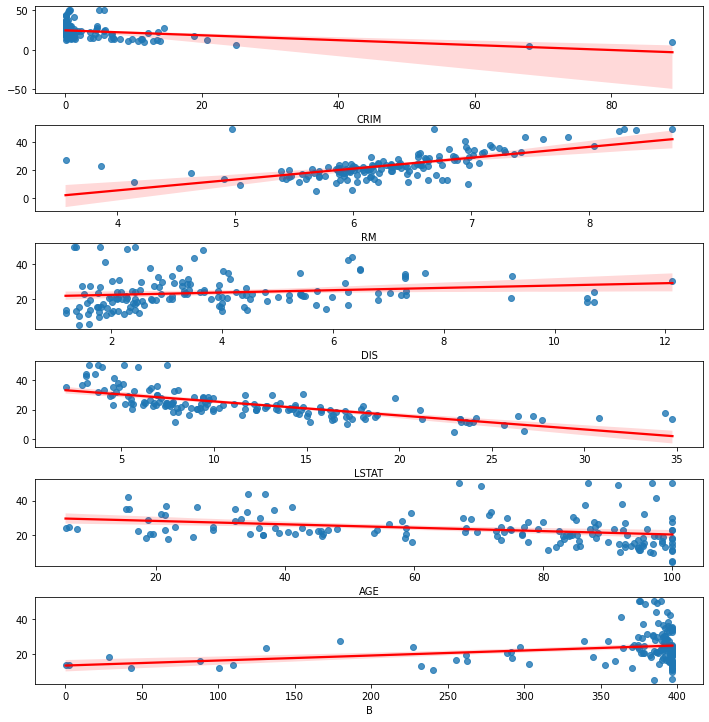

In [96]:
fig, axs = plt.subplots(ncols=1, nrows=6, figsize=(10,10))
fig.tight_layout()

for i, feature in enumerate(columns_ft) :
    plt.subplot(6,1,i+1)
    sns.regplot(x=X_test_ft[feature], y=y_test.values, line_kws={"color" : "red"})